# Support Vector Machines (SVM) - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("bikeshare.csv")

In [4]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


## Data preprocessing 

In [5]:
df.isna().sum()  

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
notbizday     0
weathersit    0
temp          0
hum           0
windspeed     0
dteday        0
cnt           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


The managers of Capital Bikeshare have found that the system works smoothly until more than 500 bikes are rented in any one hour. At that point, it becomes necessary to insert extra bikes into the system and move them across stations to balance loads.

In [7]:
overload = np.where(df['cnt']>500,1,0)

In [8]:
pd.crosstab(overload,overload, normalize='all')*100

col_0,0,1
row_0,,
0,92.640543,0.000000
1,0.000000,7.359457


The dataset is relatively imbalanced. 

In [9]:
df['overload']=overload
df.drop('cnt', axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday', 'overload'],
      dtype='object')

We need to change the type of categorical variables: 

In [10]:
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday','weathersit',]

for col in categorical: 
    df[col] = df[col].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   notbizday   17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  object  
 12  overload    17379 non-null  int32   
dtypes: category(8), float64(3), int32(1), object(1)
memory usage: 749.1+ KB


In [12]:
df.drop('dteday',axis=1, inplace=True)

In [13]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'overload'],
      dtype='object')

In [14]:
df.columns.difference(categorical)

Index(['hum', 'overload', 'temp', 'windspeed'], dtype='object')

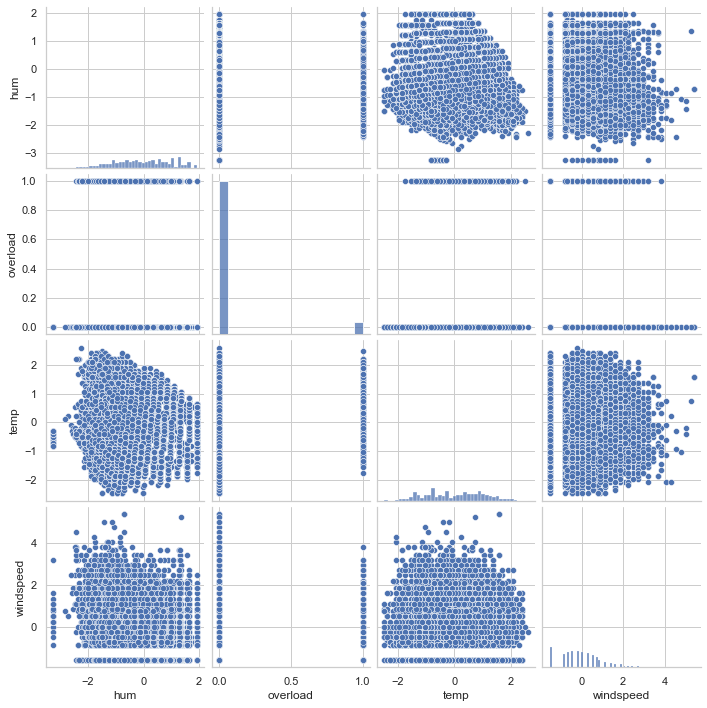

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(categorical)]);

## Scaling the features: 

Scaling the variables is a very important step in SVM. Because any variable on the larger scale, has a larger effect on the **distance** between observations. 

for this data set we are going to use standardization as our scaling strategy. 


In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.columns

Index(['temp', 'hum', 'windspeed', 'overload', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'notbizday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [18]:
df.shape

(17379, 53)

In [19]:
df.head()

,temp,hum,windspeed,overload,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334609,0.947345,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler

In [251]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc["overload"] = df["overload"]

In [252]:
df_sc.head()

,temp,hum,windspeed,overload,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
1,-1.438516,0.895539,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
2,-1.438516,0.895539,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
3,-1.334648,0.636370,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
4,-1.334648,0.636370,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314


### Defining the variables and splitting the data

In [253]:
X = df_sc.drop(columns="overload")
y = df_sc["overload"]

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state= rand_state, stratify=y)
# Data imbalance olduğu için burada stratify=y yazdım.

---

###  SVM Classification with Sklearn

In [255]:
from sklearn.svm import SVC

In [256]:
SVM_classification = SVC()
# Burada modelin içinde "C", "kernel" ve "gamma" hyperparametreleri bulunmaktadır. Bunları optimize edeceğiz.
SVM_classification.fit(X_train, y_train)

SVC()

In [257]:
y_hat = SVM_classification.predict(X_test)

In [258]:
predictions = pd.DataFrame({"y_test" : y_test, "y_hat" : y_hat})
predictions.tail(20)

,y_test,y_hat
9307,0,0
4946,0,0
5015,0,0
5973,0,0
2252,0,0
16744,0,0
6424,0,0
2793,0,0
6787,0,0
5817,0,0


### Evaluating the model on test dataset¶

---

In [259]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score,  precision_score, f1_score

def my_SVM_report(X_train, y_train, X_test, y_test, C=1, gamma = "scale", kernel="rbf"):
    svc = SVC(C = C, gamma = gamma, kernel = kernel)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    cm_labeled = pd.DataFrame(cm, index=["Actual : negative", "Actual : positive"], 
                              columns = ["Predict : negative", "Predict : Positive"])
    
    print("------------------------------------------------------")
    print(f"Accuracy = {accuracy}")
    print(f"Error_rate = {error_rate}")
    print(f"PRecision = {precision}")
    print(f"Recall = {recall}")
    print(f"f1_score = {f1score}")
    print("-------------------------------------------------------")
    return cm_labeled
    
    

In [260]:
my_SVM_report(X_train, y_train, X_test, y_test, kernel="rbf")
# Datamızın target feature imbalance olduğu için burada f1 score üzerinden yorum yapmak gerekir.

------------------------------------------------------
Accuracy = 0.9735
Error_rate = 0.0265
PRecision = 0.89
Recall = 0.73
f1_score = 0.8
-------------------------------------------------------


,Predict : negative,Predict : Positive
Actual : negative,4795,35
Actual : positive,103,281


### ROC and AUC 

We cannot define ROC and AUC in SVM. Why?

In [261]:
# Bu modelde (SVC) farklı threshold deneme imkanı yok. 
# ROC ve AUC, threshold'lar üzerinden çizim yaptığı için burada kullanamıyoruz.

---

## Tuning hyperparameters: 
### Gridsearch
Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a **Gridsearch**, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

. **C** represents **cost** of misclassification. A large C means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance) https://scikit-learn.org/stable/modules/svm.html

. **gamma** is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’. 
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [262]:
param_grid = {
                "C": [12, 13], 
                "gamma" : ["scale", "auto", 0.01, 0.001], 
                "kernel" : ['rbf', "sigmoid"] # daha çok seçenek eklenebilir ancak fit işlemi çok uzun zaman alır.
             }

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
grid_model = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=2, cv = 5, n_jobs=-1)

In [265]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [12, 13], 'gamma': ['scale', 'auto', 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

What **fit** does is a bit more involved than usual. First, it tries multiple combinations from param_grid by cross-validation to find the best parameter combination. Once it has the best combination, it retrain the model using optimal hyperparameters on the entire train set.

In [266]:
grid_model.best_params_

{'C': 12, 'gamma': 0.01, 'kernel': 'rbf'}

In [267]:
grid_model.best_score_

0.9700780928894369

In [268]:
y_hat_optimized = grid_model.predict(X_test)

In [269]:
predictions["y_hat_optimized"] = y_hat_optimized
predictions.tail(20)

,y_test,y_hat,y_hat_optimized
9307,0,0,0
4946,0,0,0
5015,0,0,0
5973,0,0,0
2252,0,0,0
16744,0,0,0
6424,0,0,0
2793,0,0,0
6787,0,0,0
5817,0,0,0


In [270]:
grid_model.best_params_

{'C': 12, 'gamma': 0.01, 'kernel': 'rbf'}

In [271]:
my_SVM_report(X_train, y_train, X_test, y_test, C=12, gamma=0.01, kernel="rbf")

------------------------------------------------------
Accuracy = 0.9768
Error_rate = 0.0232
PRecision = 0.86
Recall = 0.82
f1_score = 0.84
-------------------------------------------------------


,Predict : negative,Predict : Positive
Actual : negative,4779,51
Actual : positive,70,314


In [272]:
# Accuracy = 0.9735
# Error_rate = 0.0265      # Bu score'lar da default değerler ile aldığımı score'lar
# PRecision = 0.89
# Recall = 0.73
# f1_score = 0.8

---

#### Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [273]:
# Cross-validation hyperparameter tuning için ve test scoru'muzun gerçek değerini öğrenmek için yapılır.
# Ancak biz GridSearch ile hyperparameter tuning yapmıştık. Burada gerçek skore'umzu öğreneceğiz.

In [274]:
from sklearn.model_selection import cross_val_score

In [275]:
grid_model.best_params_

{'C': 12, 'gamma': 0.01, 'kernel': 'rbf'}

In [276]:
f1_score = cross_val_score(estimator=SVC(C = 12, gamma=0.01, kernel="rbf"), X=X_train, y=y_train, cv=5, scoring="f1")
# dataset imbalance olduğu için f1_score üzerinden gridsearch yapmak istiyorum.

In [277]:
f1_score.mean()
# 0.84 almıştık daha önce. çok birşey değişmedi.Asıl score budur.

0.7936193979263736

---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

Let's balance our target variables first!

In [278]:
df_vis = df_sc[["overload", "temp", "windspeed"]]

In [279]:
pd.crosstab(df_vis["overload"], df_vis["overload"])

overload,0,1
overload,,
0,16100,0
1,0,1279


In [280]:
# Bu datadaki imbalance durumu 2 şekilde çözebiliriz. 
 # Birincisi, target 1 olan datayı elde tutarız ancak targe 0 olan data sayısını 1279'a düşürürüz ve ikisini eşitleriz.
 # İkinci yöntem ise sentetik olarak target 1 olan data sayısını 16100'e çıkarırız.

# ancak biz yukarıda stratify = y yaparak split ederken dengeli split etmeyi tercih ettik.(3.yöntem :))
# Çünkü datayı manipule etmek istemedik.

In [281]:
df_vis.loc[df_vis["overload"] == 1,].head()

,overload,temp,windspeed
2659,1,1.054335,0.886099
2683,1,0.950466,1.374096
2684,1,0.950466,2.106501
2707,1,0.846597,1.618504
2732,1,0.742729,1.374096


In [282]:
from random import sample
sample(list(df_vis.loc[df_vis["overload"] == 0,].index), 5)

[15611, 3549, 14399, 11736, 9598]

In [283]:
# Example
sample([1, 3, 5 , 6, 11 ,33 , 523, 33], 3)

[1, 6, 3]

In [284]:
overloads_only = sample(list(df_vis.loc[df_vis["overload"] == 1,].index), 100)
non_overloads_only = sample(list(df_vis.loc[df_vis["overload"] == 0,].index), 100)

df1 = df_vis.iloc[overloads_only]
df2 = df_vis.iloc[non_overloads_only]

In [285]:
df_vis = pd.concat([df1, df2], axis=0)
df_vis

,overload,temp,windspeed
14619,1,1.054335,-1.553889
14054,1,1.262073,-0.211691
13525,1,1.262073,-0.211691
6243,1,0.846597,-0.821484
13227,1,1.158204,-0.456099
...,...,...,...
11359,0,-0.815304,1.374096
10453,0,-0.088222,-1.553889
16613,0,-1.230779,-0.211691
7391,0,0.119516,-0.211691


In [286]:
X = df_vis[["temp", "windspeed"]]
y = df_vis[["overload"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [287]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting SVM classifier to the Training set

In [288]:
SVM_classifier = SVC(C=1, kernel="rbf")
SVM_classifier.fit(X_train, y_train.values.reshape(-1,))

SVC(C=1)

In [289]:
y_train.iloc[:, 0].values

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


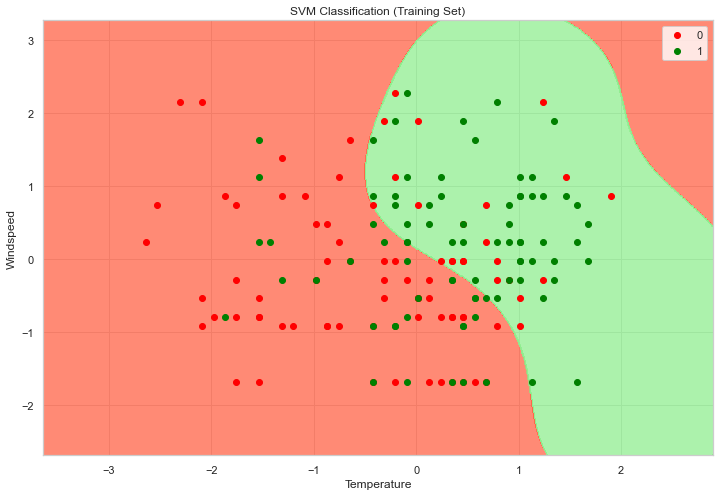

In [290]:
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:, 0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step=0.01))
                     
from matplotlib.colors import ListedColormap
plt.contourf(X1, X2, SVM_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("#FF6347", "#90EE90")))
                    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
                
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("SVM Classification (Training Set)")
plt.xlabel("Temperature")
plt.ylabel("Windspeed")
plt.legend()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


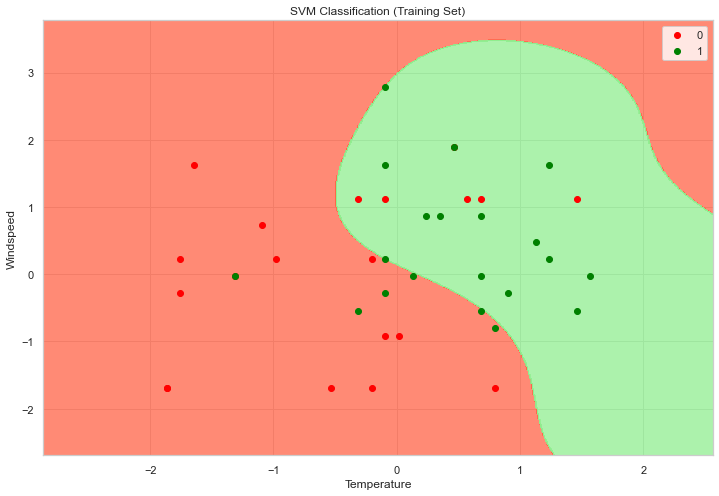

In [291]:
plt.figure(figsize=(12,8))

X_set, y_set = X_test, y_test.iloc[:, 0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step=0.01))
                     
from matplotlib.colors import ListedColormap
plt.contourf(X1, X2, SVM_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("#FF6347", "#90EE90")))
                    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
                
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(("red", "green"))(i), label = j)
plt.title("SVM Classification (Test Set)")
plt.xlabel("Temperature")
plt.ylabel("Windspeed")
plt.legend()

**FUN exercise**: now try the following combinations:
1. kernel = 'linear' , 'poly'
2. kernel= 'rbf', C=1, C=0.0001 and C=100000 
3. Kernel= 'rbt' , C=1, gamma= 0.01, gamma = 10 



---

#### Additional links

1. SKlearn documentation : https://scikit-learn.org/stable/modules/svm.html
2. Convex Optimization : https://www.amazon.com/dp/0521833787/?coliid=I1FTQ8R03FUUQK&colid=VIHSBPX6N52B&psc=1&ref_=lv_ov_lig_dp_it
3. Performance measures (1): https://en.wikipedia.org/wiki/Confusion_matrix
4. ROC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
5. Multiple class SVM in Python: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02
6. GridsearchCV documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
7. Decision boundary visualization in Python: https://github.com/MichalOleszak/KnowledgeBank/blob/master/blog_posts/svm_kernels/svm_kernels.ipynb